# Dataset Information
  #### The dataset contains 3 classes of 50 instances each.where each class refers to a type of a iris plant.one class is linearly seprated from othe two,later are Not linearly seprable from each other.
  
  ## Attribute Information:
  ### 1: sepal length in cm
  ### 2: sepal width in cm 
  ### 3: petal length in cm
  ### 4: petal width in cm
  ### 5: class:-- setosa,versicolour,virginica

# Importing modules:

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt


# Load Dataset

In [2]:
df=sns.load_dataset('Iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# To display statistics of dataset

In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# To display the number of samples in each class

In [6]:
df["species"].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

# Preprocessing the dataset

In [7]:
#check for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Explorartory Data Analysis

### Histograms 

<AxesSubplot:>

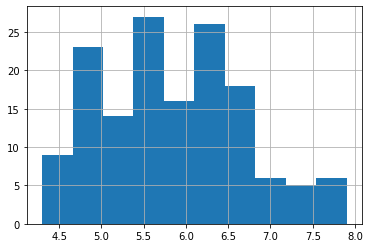

In [8]:
df["sepal_length"].hist()

<AxesSubplot:>

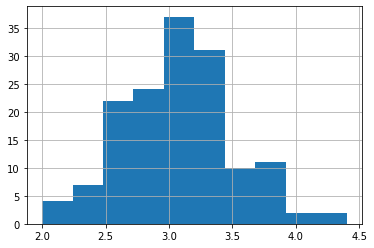

In [9]:
df["sepal_width"].hist()

<AxesSubplot:>

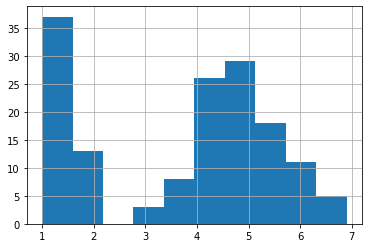

In [10]:
df["petal_length"].hist()

<AxesSubplot:>

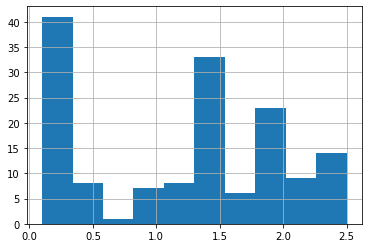

In [11]:
df["petal_width"].hist()

### scatterplots

In [12]:
colors=["#808A87","#2F4F4F","#FF1493"]
species=["setosa", "virginica" ,"versicolor" ]

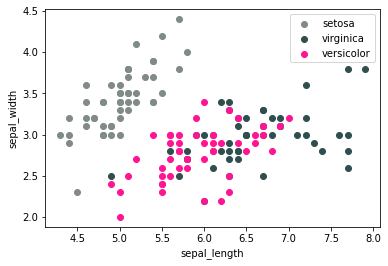

In [13]:
for i in range(3):
    x=df[df["species"]== species[i]]
    plt.scatter(x["sepal_length"],x["sepal_width"],c=colors[i],label=species[i])
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.legend()

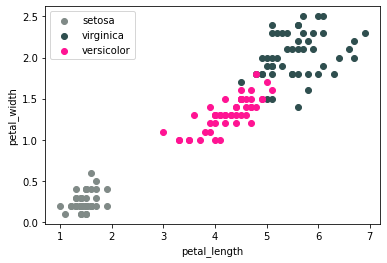

In [14]:
for i in range(3):
    x=df[df["species"]== species[i]]
    plt.scatter(x["petal_length"],x["petal_width"],c=colors[i],label=species[i])
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.legend()

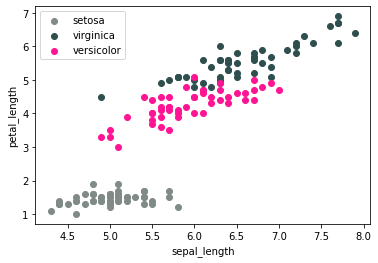

In [15]:
for i in range(3):
    x=df[df["species"]== species[i]]
    plt.scatter(x["sepal_length"],x["petal_length"],c=colors[i],label=species[i])
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.legend()

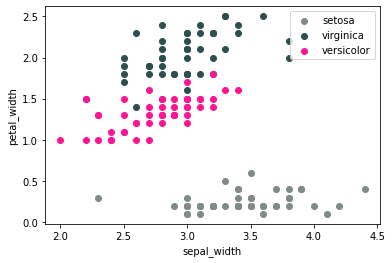

In [16]:
for i in range(3):
    x=df[df["species"]== species[i]]
    plt.scatter(x["sepal_width"],x["petal_width"],c=colors[i],label=species[i])
plt.xlabel("sepal_width")
plt.ylabel("petal_width")
plt.legend()

# Correlation Matrix

In [17]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

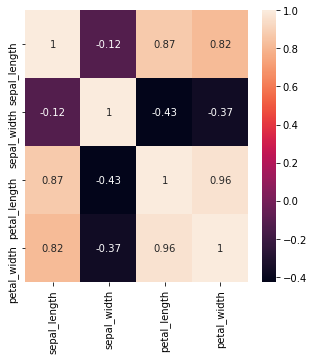

In [18]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(5,5))
sns.heatmap(corr,annot=True,ax=ax)

# Label Encoder
#### Label encoder refers to converting the labels or worlds into numeric format so as to covert into machine readable form


In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [20]:
df["species"] = le.fit_transform(df["species"])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model_Training By DecisionTree

In [37]:
from sklearn.model_selection import train_test_split
#train=70%
#test=30%
X=df.drop(columns=["species"])
Y= df["species"]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30)

In [38]:
#dicision Tree
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [39]:
#model training
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [40]:
# print metic to get performance
print("Accuracy:",model.score(x_test,y_test)*100,"%")

Accuracy: 93.33333333333333 %


# By Linear Regression

In [34]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [35]:
#model training
model.fit(x_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
# print metic to get performance
print("Accuracy:",model.score(x_test,y_test)*100,"%")

Accuracy: 95.55555555555556 %


# By KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [42]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [43]:
print("Accuracy:",model.score(x_test,y_test)*100,"%")

Accuracy: 97.77777777777777 %
